# 4. 신경망 학습
학습을 통해 가중치 매개변수의 최적값을 자동으로 획득해보자.   
신경망을 학습할 수 있게 해주는 지표인 손실 함수를 통해, 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다.   
함수의 기울기를 활용하는 경사법을 알아보자.

# 4.1 데이터에서 학습한다!
신경망은 데이터를 보고 가중치 매개변수의 값을 자동으로 결정한다.   
신경망 학습과 MNIST 데이터셋의 손글씨 숫자를 학습하는걸 코드로 구현해보자.

### 4.1.1 데이터 주도 학습
머신러닝은 데이터가 생명이다.   
데이터에서 패턴을 발견해 답을 찾는다.

보통 문제를 해결하기 위해, 사람이 생각하고 답을 찾는게 일반적이다.   
그리고 사람의 경험과 직관을 단서로 시행착오를 거듭하며 일을 진행한다.   
하지만 기계학습은 사람의 개입을 최소화하고 데이터로부터 패턴을 찾으려 시도한다.   
특히 신경망과 딥러닝은 기존 기계학습보다 사람의 개입을 더욱 배제한다.

사람이 숫자를 분류하는 프로그램을 설계하려면, 그 안에 숨은 규칙성을 명확한 로직으로 풀기 어렵다.   
그래서 신경망은 이미지에서 __특징(feature)__을 추출하고 특징의 패턴을 기계학습 기술로 학습한다.   
여기서 특징은 입력 데이터에서 중요한 데이터를 정확하게 추출할 수 있도록 설계된 변환기를 가리킨다.

기계학습은 모아진 데이터로부터 기계가 규칙을 찾아낸다.   
하지만 이미지를 벡터로 변환할 때 사용하는 특징은 여전히 사람이 설계해야 한다.   
이는 문제에 적합한 특징을 사용하지 않으면 좋은 결과를 얻을 수 없음을 뜻한다.   
즉 기계학습도 사람이 적절한 특징을 생각해야한다.   

신경망은 이미지에 포함된 중요한 특징까지 기계가 스스로 학습하게 된다.   
신경망의 이점으로 모든 문제를 같은 맥락에서 풀 수 있고, 주어진 문제의 패턴을 발견하려 시도한다.   
즉, 모든 문제를 주어딘 데이터 그대로를 입력으로 활용해 end-to-end로 학습할 수 있다.

### 4.1.2 훈련 데이터와 시험 데이터
기계학습은 범용 능력(아직 보지 못한 데이터)을 제대로 획득하는 것이 최종 목표이다.   
그래서 데이터셋을 훈련 데이터와 시험 데이터를 나눠서 평가한다.   
하지만 데이터셋 하나로만 학습과 평가를 진행하면 수중의 데이터셋만 지나치게 최적화된 오버피팅 현상이 나올 수도 있다.

# 4.2 손실 함수
신경망에서 현재의 상태를 하나의 지표로 표현한다.   
그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색해야한다.   
신경망 학습에서 사용하는 지표는 __손실 함수(loss function)__이다.   
일반적으로 오차제곱합, 교체 엔트로피 오차를 사용한다.

### 4.2.1 오차제곱합
__오차제곱합(sum of squares for error, SSE)__을 알아보자.   
$E = {{1}\over{2}}\sum\limits_k(y_k-t_k)^2$   
$y_k$는 신경망의 출력, $t_k$는 정답 레이블, $k$는 데이터의 차원 수를 나타낸다.

여기서 y는 소프트맥스의 출력으로 확률로 해석하자.   
그리고 t는 정답만 1로 나타내는 원-핫 인코딩 형태이다.

In [1]:
import numpy as np

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [3]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

sum_squares_error(np.array(y), np.array(t))

0.5975

신경망이 추정한 값과 정답이 일치한 상황과 그렇지 않은 상황에 대해 SSE 값을 출력해봤다.

### 4.2.2 교차 엔트로피 오차
손실 함수로 __교차 엔트로피 오차(cross entropy error, CEE)__를 많이 사용하므로 확인해보자.

$E = -\sum\limits_kt_klogy_k$

여기서 log는 밑이 $e$인 자연로그($log_e$)이다.   
$y_k$는 신경망의 출력(추정값), $t_k$는 정답 레이블이고 원-핫 인코딩이다.   
그래서 실질적으로 정답일 때 추정($t_k$가 1일때 $y_k$)의 자연로그를 계산하게 된다.   
예를들면 정답 레이블에 맞는 신경망의 출력 $y_k$가 0.6이면 교차 엔트로피 오차는 -log0.6 = 0.51이 된다.   
같은 조건에서 신경망 출력이 0.1이면 -log0.1 = 2.30이 된다.   

![](https://support.minitab.com/ko-kr/minitab/18/naturallog_scatterplot.png)   
자연로그의 그래프를 확인해보면 x가 1일때 y가 0이되고, x가 0에 가까워질수록 y의 값은 점점 작아진다.

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

np.log() 함수에 0을 넣으면 마이너스 무한대인 -inf가 나와 계산을 진행할 수 없기에, 아주 작은 값인 delta를 넣어줬다.

In [6]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [7]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 4.2.3 미니배치 학습
기계학습 문제는 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아낸다.   
즉, 훈련 데이터 개수만큼 이들의 손실 함수 값들의 합을 지표로 삼는다.   

훈련 데이터 모두에 대한 손실 함수의 합을 구하는 방법을 알아보자.   
$E = -{{1}\over{N}}\sum\limits_n\sum\limits_kt_{nk}logy_{nk}$ 

데이터가 $N$개이고 $t_{nk}$는 $n$번째 데이터의 $k$번째 값을 의미한다.   
그리고 $N$으로 나누어 정규화를 하고, $N$으로 나눔으로써 __평균 손실 함수__를 구하는 것이다.

MNIST의 데이터셋은 훈련 데이터가 60000개였다.   
모든 데이터를 대상으로 손실 함수의 합을 구하려면 시간이 걸린다.   
그래서 데이터의 일부를 추려 전체의 근사치로 이용할 수 있다.   
이 일부를 __미니 배치__라고 한다.   
즉, 6만장의 훈련 데이터 중에서 100장을 무작위로 뽑아 학습하는 것이다.

### MNIST dataset 불러오기

In [8]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname('/content/drive/Othercomputers/MacBook_Air/Deep_Learning_from_Scratch/V_01/dataset')
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47.0) Gecko/20100101 Firefox/47.0"}
    request = urllib.request.Request(url_base+file_name, headers=headers)
    response = urllib.request.urlopen(request).read()
    with open(file_path, mode='wb') as f:
        f.write(response)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


if __name__ == '__main__':
    init_mnist()


Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [9]:
import sys, os
# sys.path.append(os.pardir)
import numpy as np
# from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [10]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [11]:
np.random.choice(60000, 10)

array([38080, 45946, 12639,  7418,  9587, 56739, 57939, 26367, 46533,
       45232])

훈련 데이터에서 무작위로 batch_size만큼 꺼내올 수 있다.   
np.random.choice()로 랜덤으로 선택해 인덱스로 사용하여 미니배치를 뽑아내면 된다.

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기
교차 엔트로피 오차에서 배치 데이터를 구현할 수 있게 해보자.   
예측한 y의 값이 1차원인 데이터 하나당 교차 엔트로피 오차를 구하는 경우에는 reshape로 데이터의 형상을 바꿔준다.   
그리고 배치 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산한다.

In [12]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

정답이 원-핫 인코딩이 아닌 숫자 레이블로 주어졌을 때 교차 엔트로피 오차를 어떻게 구현할까?

In [13]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

이 구현에서 원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시해도 좋다는 것이 핵심이다.   
이는 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있다.   
그래서 원-핫 인코딩시 `t*np.log(y)`를 레이블 표현은 `np.log(y[np.arange(batch_size), t])`로 구현한다.

`np.log(y[np.arange(batch_size), t])`에서 np.arange(batch_size)는 0부터 batch_size-1까지 배열을 생성한다.   
t에는 레이블이 [2,7,0,9,4]와 같이 저장되어 있으므로 `y[np.arange(batch_size), t]`는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출한다.   
(예를들자면 `[y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]`인 넘파이 배열을 생성한다.)

### 4.2.4 왜 손실 함수를 설정하는가?
궁극적인 목표는 높은 정확도를 끌어내는 매개변수 값을 찾는 것이다.   
그렇다면 왜 정확도 지표를 두고 손실 함수의 값을 택할까?

신경망 학습에서 __미분__의 역할이 있기 때문이다.   
신경망 학습에서 최적의 매개변수(가중치, 편향)을 탐색할 때 손실 함수의 값을 가능한 작게 하는 매개변수 값을 찾는다.   
이때 매개변수의 기울기를 미분을 통해 계산하고, 그 미분 값을 단서로 매개변수의 값을 갱신한다.

예를들어 가중치 매개변수의 손실 함수의 미분이란?   
> 가중치 매개변수의 값을 아주 조금 변화 시켰을 때, 손실 함수가 어떻게 변하는지 볼 수 있다.

만약 미분 값이 음수면 가중치 매개변수를 양의 방향으로 변화 시켜 손실 함수의 값을 줄일 수 있다.   
반대로 미분 값이 양수면 가중치 매개변수를 음의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다.   
그러나 미분 값이 0이면 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 줄어들지 않는다.   
그래서 가중치 매개변수의 갱신은 거기서 멈춘다.

정확도를 지표로 삼으면 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없게 된다.   
이를 구체적인 예를 통해 알아보자.   
한 신경망이 100장의 훈련 데이터 중 32장을 올바로 인식한다면 정확도는 32%이다.   
정확도가 지표였다면 가중치 매개변수의 값을 조금 조절해도 정확도는 32%이다.   
즉, 매개변수를 약간만 조정해서는 정확도가 개선되지 않는다.   
만약 개선된다 하더라도 그 값은 32.0123%와 같은 연속적인 변화보다는 33%, 34%처럼 불연속적인 값으로 바뀌어버린다.

손실 함수를 지표로 삼으면 어떻게 바뀔까?   
현재 손실 함수의 값은 0.92543... 같은 수치이다.   
구리고 매개변수의 값이 조금 변하면 그에 반응하여 손실 함수의 값도 0.93432... 처럼 연속적으로 변화한다.

정리하자면 정확도는 매개변수의 사소한 변화에 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불 연속적이다.   
이는 계단 함수를 활성화 함수로 사용하지 않는 이유와 동일하다.   
만약 활성화 함수로 계단 함수를 사용하면 신경망 학습이 잘 이뤄지지 않는다.   
계단 함수의 미분은 0이 아닌 장소에서 0이다.   

계단 함수는 한순간만 변화를 일으키지만, 시그모이드 함수의 미분은 연속적으로 변하고 곡선의 기울기도 연속적으로 변한다.   
즉 시그모이드 함수의 미분은 어느 장소라도 0이 되지는 않는다.   
신경망 학습에서 중요한 성질로, 기울기가 0이 되지 않아 신경망이 올바르게 학습할 수 있다.

# 4.3 수치 미분
경사법은 기울기 값을 기준으로 나아갈 방향을 정한다.   
기울기를 알기 위해 미분부터 복습해보자.

### 4.3.1 미분
10분동안 2km씩 달렸다고 가정해보자.   
속도는 2 / 10 = 0.2km/분 으로 계산할 수 있다.   

위 예에서는 달린 거리가 시간에 대해 얼마나 변화했는지 계산한다.   
10분에 2km를 뛰었다는 것은, 10분 동안의 평균 속도를 구한 것이다.   
__미분은 특정 순간의 변화량을 뜻한다.__   
그래서 10분이라는 시간을 가능한 줄여 한 순간의 변화량을 얻는 것이다.   

미분의 수식은 다음과 같다.   
${df(x)\over{dx}} = \underset{h->0}{lim}{f(x+h)-f(x)\over{h}}$

좌변 $f(x)$의 $x$에 대한 미분($x$에 대한 $f(x)$의 변화량)을 나타내는 기호이다.   
이는 $x$의 작은 변화가 함수 $f(x)$를 얼마나 변화시키느냐를 의미한다.   
이때 시간을 뜻하는 $h$를 한없이 0에 가깝게 한다는 의미로 $\underset{h->0}{lim}$를 나타낸다.

In [14]:
# 미분 나쁜 구현의 예
def numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) - f(x)) / h

함수의 이름은 수치 미분(numerical differentiation)이다.   
두 가지의 인수(함수 f와 f에 넘길 인수 x)를 받는다.   
문제가 없어 보일수도 있지만 개선해야 할 점이 2개가 있다.

첫번째로 $h$에 작은 값을 대입하기 위해 1e-50을 사용했다.   
하지만 이는 반올림 오차 문제를 일으킨다.   
이는 소수점 8자리 이하가 생략되어 최종 계산 결과에 오차가 생기게 한다.

In [15]:
np.float32(1e-50)

0.0

너무 작은 값을 이용하면 컴퓨터로 계산하는데 문제가 된다.   
그래서 컴퓨터가 이해할 수 있는 `h = 10-4`로 바꾸자.   

두번째는 함수 f와 차분과 관련된 것이다.   
x + h와 x 사이의 함수 f 차분을 계산하고 있지만 이는 오류가 있다.   

![](https://mblogthumb-phinf.pstatic.net/MjAxODA2MTVfMTQ1/MDAxNTI5MDUyMjE0MTkw.Gye5r5O_sHAWk79HZbGyQpi7rE4Gwmb3bCVRXTrvj6Ig.FmqyWXoIfUXckKwoPPPOQza0ZRz5G7jtcMGol1ypjlUg.PNG.ssdyka/fig_4-5.png?type=w2)   
진정한 미분은 위 그림과 같이 x 위치의 함수의 기울기에 해당하지만, 구현한 미분은 x + h와 x사이의 기울기에 해당된다.   
그래서 진정한 미분과 위에 구현한 값은 엄밀히 일치하지 않는다.   
이 차이는 $h$를 무한히 0으로 좁히는 것이 불가능해 생기는 한계이다.

그래서 이러한 오차를 줄이기 위해 $(x + h)$와 $(x - h)$일 때 함수 $f$의 차분을 계산하는 방법을 쓰기도 한다.   
이 차분은 $x$를 중심으로 전후의 차분을 계산한다는 의미로 __중심 차분__ 혹은 __중앙 차분__이라 한다.

In [16]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

> 아주 작은 차분으로 미분하는 것을 수치 미분이라고 하며 근사치로 계산한다.   
수식을 전개해 미분하는 것은 해석적 미분이라고 표현한다.   
해석적 미분은 오차를 포함하지 않는 진정한 미분 값을 구해준다.

### 4.3.2 수치 미분의 예
$y = 0.01x^2 + 0.1x$   
다음과 같은 2차 함수를 수치 미분해보자.

In [17]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

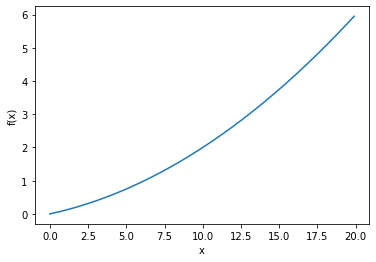

In [18]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [19]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


미분 값이 $x$에 대한 $f(x)$의 변화량이다.   
즉, 함수의 기울기에 해당한다.   
$f(x) = 0.01x^2 + 0.1x$의 해석적 해는 ${df(x)\over{dx}} = 0.02x + 0.1$이다.   
그래서 $x$가 5와 10일때의 진정한 미분은 0.2, 0.3이 된다.   
이 오차는 매우 작고, 실제로 거의 같은 값이라고 해도 될 만큼 작은 오차이다.

![](https://blog.kakaocdn.net/dn/rtr23/btqL6I0GC4t/ADSyT1zvsGHxUtB8HiVIkK/img.png)

### 4.3.3 편미분
다음과 같은 수식을 구현해서 편미분을 알아보자.   
$f(x_0, x_1) = x^2_0 + x^2_1$

In [20]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # return np.sum(x**2)

위 식은 다음과 같은 3차원으로 그려진다.   
![](https://velog.velcdn.com/images%2Fksj5738%2Fpost%2F0269fe78-698c-4c01-8f7d-4cf252fcee0f%2Fimage.png)

수치 미분의 예에서 주의할 점은 변수가 2개라는 것이다.   
그래서 $x_0$, $x_1$중 어느 변수에 대한 미분인지 구별해야 한다.   
그리고 변수가 여럿인 함수에 대한 미분을 편미분이라고 한다.   
수식으로 ${\alpha f\over{\alpha x_0}}$나 ${\alpha f\over{\alpha x_1}}$처럼 쓴다.

다음 문제를 풀어보자.   
$x_0$ = 3, $x_1$ = 4일때 $x_0$에 대한 편미분 ${\alpha f \over{\alpha x_0}}$을 구하라.

In [21]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

$x_0$ = 3, $x_1$ = 4일때 $x_1$에 대한 편미분 ${\alpha f \over{\alpha x_1}}$을 구하라.

In [22]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

위 문제의 결과처럼 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구한다.   
여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정한다.

# 4.4 기울기
지금까지 $x_0$, $x_1$의 편미분을 변수별로 따로 계산했는데 이들을 동시에 계산하고 싶으면 어떻게 할까?   
$x_0 = 3, x_1 = 4$일때 $(x_0, x_1)$ 양쪽의 편미분을 묶어서 ${({\alpha f\over{\alpha x_0}}, {\alpha f\over{\alpha x_1}})}$처럼 모든 변수의 편미분을 벡터로 정리한 것을 __기울기(gradient)__라고 한다.

In [23]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

In [24]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


세 점 (3,4), (0,2), (3,0)에서의 기울기를 구해봤다.   
그렇다면 기울기의 의미는 무엇일까?

![](https://blog.kakaocdn.net/dn/TCkEA/btqIqX12ivj/kgkKLdIBGqt4VNkumMdSck/img.png)   
$f(x_0,x_1) = x^2_0+x^2_1$의 기울기   
다음과 같이 방향을 가진 벡터(화살표)로 기울기 그림이 그려진다.   
기울기는 함수의 가장 낮은 장소(최솟값)을 가리키는 것 같다.

__정확히는 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다.__

### 4.4.1 경사법(경사 하강법)
기계학습 문제 대부분은 학습 단계에서 최적의 매개변수를 찾아낸다.   
신경망도 최적의 매개변수 가중치와 편향을 학습하면서 찾아야 한다.   
여기서 최적이란 손실 함수가 최솟값이 될 때의 매개변수 값이다.   
일반적으로 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지 짐작할 수 없다.   
이런 상황에서 기울기를 이용해 함수의 최솟값을 찾으려는 것이 경사법이다.

주의할 점은 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기라는 것이다.   
그러나 기울기가 가리키는 곳이 함수의 최솟값이 있는지 보장할 수 없다.   
실제로 복잡한 함수는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분이다.

> 함수가 극솟값(local minimum), 최솟값(global minimum), 안장점(saddle point)가 되는 장소에서 기울기가 0이다.   
그래서 경사법은 기울기가 0인 장소를 찾미나 그것이 반드시 최솟값이라고는 할 수 없다. 

기울어진 방향이 최솟값을 가리키는 것은 아니나, 그 방향으로 가야 함수 값을 줄일 수 있다.   
그래서 경사법을 통해 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다.   
그리고 이동한 장소에서 다시 기울기를 구하고, 다시 나아가기를 반복한다.   
이렇게 함수의 값을 점차 줄이는 것이 __경사법__이다.

경사법을 수식을 통해 알아보자.   
$x_0 = x_0 - \eta{\alpha f\over{\alpha x_0}}$   
$x_1 = x_1 - \eta{\alpha f\over{\alpha x_1}}$

$\eta$(에타)는 갱신하는 양을 나타낸다.   
그리고 이를 __학습률(learning rate)__이라고 말한다.   
학습률은 보통 0.01, 0.001등 미리 특정 값으로 정해야 하는데, 일반적으로 값이 너무 크거나 작으면 좋은 장소를 찾아갈 수 없다.   
신경망 학습에서 학습률 값을 변경하면서 올바르게 학습하고 있는지 확인하면서 진행한다.

In [25]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

위와 같이 경사 하강법을 구현할 수 있다.   
f는 최적화하려는 함수, init_x는 초깃값을 말한다.   
함수의 기울기는 numerical_gradient(f, x)로 구하고 그 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num번 반복한다.

경사법으로 $f(x_0, x_1) = x^2_0+x^2_1$의 최솟값을 구해보자.

In [26]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

거의 (0,0)에 가까운 결과가 나왔다.   
진정한 최솟값은 (0,0)이므로 경사법을 통해 거의 정확한 결과를 얻었다.   

![](https://compmath.korea.ac.kr/appmath2021/_images/plot_lnn_grad_trace.png)   
그림을 통해 경사법을 이용한 갱신 과정을 확인해보자.

In [27]:
# learning rate가 큰 예
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))

# learning rate가 작은 예
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


학습률이 너무 크면 큰 값으로 발산하고, 너무 작으면 거의 갱신되지 않은 채 끝난다.

### 4.4.2 신경망에서의 기울기
신경망 학습에서도 기울기를 구해야 한다.   
이 기울기는 가중치 매개변수에 대한 손실 함수의 기울기이다.   
2x3 shape를 가진 가중치 $W$, 손실 함수 $L$인 신경망을 생각해보자.   
이 경우 경사는 ${\alpha L\over\alpha W}$로 표현할 수 있다.

$W = ([[w_{11}, w_{12}, w_{13}],[w_{21}, w_{22}, w_{23}]])$   
${\alpha L\over\alpha W} = ([[{\alpha L\over\alpha W_{11}}, {\alpha L\over\alpha W_{12}}, {\alpha L\over\alpha W_{13}}], [{\alpha L\over\alpha W_{21}}, {\alpha L\over\alpha W_{22}}, {\alpha L\over\alpha W_{23}}, ]])$

1행 1번쨰 원소인 ${\alpha L\over\alpha W_{11}}$은 $w_11$을 조금 변경했을 때 손실 함수 $L$이 얼마나 변화하는지 나타낸다.   
중요한 점은 ${\alpha L\over\alpha W}$ 형상이 $W$와 같다.   

위 신경망을 예로 실제로 기울기를 구하는 코드를 구현해보자.

In [28]:
import numpy as np
# import sys, os
# sys.path.append(os.pardir)
# from common.functions import softmax, cross_entropy_error
# from common.gradient import numerical_gradient

def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        it.iternext()   
        
    return grad

In [29]:
class simpleNet:
    def __init__(self):
        self.W = np.random.rand(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

simpleNet 클래스는 형상이 2x3인 가중치 매개변수 하나를 인스턴스 변수로 갖는다.   
predict(x)와 loss(x, t)에 들어가는 x는 입력 데이터, t는 정답 레이블이다.

In [30]:
net = simpleNet()
print(net.W) # 가중치 매개변수
print(net.W.shape)

[[0.02641031 0.52079936 0.93019882]
 [0.06945989 0.80567952 0.24338993]]
(2, 3)


In [31]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

[0.07836009 1.03759118 0.77717022]
1


In [32]:
t = np.array([0,1,0]) # 정답 레이블
net.loss(x, t)

0.7672866603813425

In [33]:
def f(W):
    return net.loss(x, t) # y, t

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.10674165 -0.32143734  0.21469568]
 [ 0.16011248 -0.48215601  0.32204353]]


numerical_gradient(f, x)를 사용해 기울기를 구해보자.   
여기서 f는 내부에서 f(x)를 실행하는데, 일관성을 위해 f(W)를 정의했다.

dW는 2x3의 2차원 배열이다.   
여기서 $w_{21}$을 $h$만큼 올리면 손실함수의 값은 0.2$h$만큼 증가한다는 의미를 갖고 있다.   
손실 함수를 줄인다는 관점에서 ${\alpha L \over \alpha W_{11}}$은 0.13이니 음의 방향으로 갱신해야하고, ${\alpha L \over \alpha W_{22}}$는 -0.53으로 양의 방향으로 갱신해야 함을 알 수 있다.   
그리고 한 번에 갱신되는 양은 ${\alpha L \over \alpha W_{11}}$보다 ${\alpha L \over \alpha W_{22}}$가 크게 기여한다는 사실도 알 수 있다.

람다를 쓰면 위 구현을 더 편하게 작성할 수 있다.

In [34]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.10674165 -0.32143734  0.21469568]
 [ 0.16011248 -0.48215601  0.32204353]]


# 4.5 학습 알고리즘 구현하기
신경망 학습의 절차를 복습해보자.   

__전제__   
신경망에 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과성을 학습이라고 한다.   
__1단계, 미니배치__   
훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라고 하며, 미니배치의 손실 함수 값을 줄이는 것이 목표이다.   
__2단계, 기울기 산출__   
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.   
__3단계, 매개변수 갱신__   
가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.   
__4단계, 반복__   
1~3단계를 반복한다.

경사 하강법으로 매개변수를 갱신하는 방법인데, 데이터를 미니배치로 무작위 선정이기 때문에 __확률적 경사 하강법(stochastic gradient descent, SGD)__ 이라고 한다.   


### 4.5.1 2층 신경망 클래스 구현하기
MNIST 데이터셋과 2층 신경망(은닉층 1개)으로 손글씨 숫자를 학습하는 신경망을 구현해보자.

In [35]:
# import sys, os
# sys.path.append(os.pardir)
# from common.functions import *
# from common.gradient import numerical_gradient
import numpy as np

# from common.functions import *
def identity_function(x):
    return x


def step_function(x):
    return np.array(x > 0, dtype=np.int)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
    

def relu(x):
    return np.maximum(0, x)


def relu_grad(x):
    grad = np.zeros_like(x)
    grad[x>=0] = 1
    return grad
    

def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)


def sum_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)
    
# from common.gradient import numerical_gradient
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        it.iternext()   
        
    return grad

In [42]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # weight init
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [37]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # 784,100
print(net.params['b1'].shape) # 100,
print(net.params['W2'].shape) # 100,10
print(net.params['b2'].shape) # 10,

(784, 100)
(100,)
(100, 10)
(10,)


In [38]:
x = np.random.rand(100, 784) # 100장 28x28
y = net.predict(x)

params 변수는 신경망에 필요한 매개변수가 모두 저장된다.   
params 변수에 저장된 가중치 매개변수가 예측 처리(순방향 처리)에서 사용된다.(위 코드 참고)   

grads 변수는 params 변수에 대응하는 각 매개변수의 기울기가 저장된다.(아래 코드 참고)   

In [39]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t) # 기울기 계산

print(grads['W1'].shape) # 784,100
print(grads['b1'].shape) # 100,
print(grads['W2'].shape) # 100,10
print(grads['b2'].shape) # 10,

(784, 100)
(100,)
(100, 10)
(10,)


TwoLayerNet의 `__init__`은 가중치 매개변수도 초기화한다.   
가중치 매개변수의 초깃값을 무엇으로 설정하냐가 신경망 학습의 성공을 좌우하기도 한다.(이는 나중에 자세히 살펴보자.)   
지금은 정규분포를 따르는 난수(random number)로, 편향은 0으로 초기화했다.   
loss는 손실 함수의 값을 계산하는데, 교차 엔트로피 오차(CEE)로 구현했다.   
`numerical_gradient(self, x, t)` 메서드는 각 매개변수의 기울기를 계산한다.   

### 4.5.2 미니배치 학습 구현하기
MNIST 데이터셋과 TwoLayerNet 클래스로 학습을 수행해보자.

In [40]:
# import numpy as np
# # from dataset.mnist import load_mnist
# # from two_layer_net import TwoLayerNet

# (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# train_loss_list = []

# # hyperparameters
# iters_num = 10000
# train_size = x_train.shape[0]
# batch_size = 100
# learning_rate = 0.1

# network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# for i in range(iters_num):
#     batch_mask = np.random.choice(train_size, batch_size)
#     x_batch = x_train[batch_mask]
#     t_batch = t_train[batch_mask]

#     grad = network.numerical_gradient(x_batch, t_batch)
    
#     for key in ('W1', 'b1', 'W2', 'b2'):
#         network.params[key] -= learning_rate * grad[key]
    
#     loss = network.loss(x_batch, t_batch)
#     train_loss_list.append(loss)

미니배치 크기를 100으로 했다.   
매번 6만개의 훈련 데이터에서 임의로 100개의 데이터를 추려낸다.   
100개의 미니배치를 대상으로 확률적 경사 하강법을 수행해 매개변수를 갱신한다.   
경사법에 의한 갱신 횟수를 1만번으로 설정하고, 갱신할 때마다 훈련 데이터에 대한 손실 함수를 계산하고, 그 값을 배열에 추가한다.   
이 손실 함수 값이 변화하는 추이를 그래프로 나타내면 다음과 같이 나온다.   
![](https://blog.kakaocdn.net/dn/1QBVl/btqIz4FyMJ3/dn3Vpqk51pgNyiIY8WOKOK/img.png)

학습 횟수가 늘어가면서 손실 함수의 값이 줄어든다.   
이는 학습이 잘 되고 있다는 뜻으로, 신경망의 가중치 매개변수가 서서히 데이터에 적응하고 있음을 의미한다.   
__데이터를 반복해서 학습함으로써 최적 가중치 매개변수로 학습하고 있다.__

### 4.5.3 시험 데이터로 평가하기
위 그림의 loss는 훈련 과정에 있는 미니배치에 대한 손실 함수 값이다.   
신경망 학습에서는 훈련 데이터 외의 데이터를 올바르게 인식하는지 확인해야 한다.   
즉 오버피팅을 일으키지 않는지 확인해야 한다.   

신경망 학습의 원래 목표는 범용적인 능력을 익히는 것이다.   
그래서 훈련 데이터에 포함되지 않은 데이터를 사용해 평가해야한다.

평가가 제대로 이뤄질 수 있도록 위의 코드를 수정해보자.

In [ ]:
import numpy as np
# from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# hyperparameters
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1 epoch마다 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | ' + str(train_acc) + ', ' + str(test_acc))

x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyple='--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legent(loc='lower right')
plt.show()

train acc, test acc | 0.09736666666666667, 0.0982


1 epoch마다 모든 훈련 데이터와 시험 데이터에 대한 정확도를 계산하고, 그 결과를 기록했다.   
정확도를 1 epoch마다 계산하는 이유는 for문 안에서 매번 계산하기에 시간이 오래 걸리고, 또 그렇게까지 자주 기록할 필요도 없기 때문이다.

그래프를 보면 학습이 진행될수록 훈련 데이터와 시험 데이터를 사용하고 평가한 정확도가 모두 좋아지고 있다.   
오버피팅도 일어나지 않았다.

# 4.6 정리
신경망 학습에 대해서 알아봤다.   
신경망이 학습할 수 있도록 손실 함수라는 지표를 도입하여, 이를 가장 작아지는 가중치 매개변수 값을 찾아내는 것이 신경망 학습의 목표이다.   
가능한 작은 손실 함수의 값을 찾는 수법으로 경사법을 알아봤다.   
경사법은 수치 미분을 통해 가중치 매개변수의 기울기를 구할 수 있다.